In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium
from IPython.core.display import display, HTML, Video

import sys
sys.path.append('../src')
from data_processing import (
    getDatasets,
    create_statistical_features,
    perform_kmeans_clustering,
    showMapDataClass,
    metricsDataClass
)

/var/folders/6s/m9t5x_x135n5fwsph2741ffw0000gn/T/ipykernel_71854/854875404.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML, Video


In [2]:
df1 = pd.read_csv('../data/PVS 1/dataset_labels.csv')
df1.head()

paved_road  unpaved_road  dirt_road  cobblestone_road  asphalt_road  \
0           1             0          0                 0             1   
1           1             0          0                 0             1   
2           1             0          0                 0             1   
3           1             0          0                 0             1   
4           1             0          0                 0             1   

   no_speed_bump  speed_bump_asphalt  speed_bump_cobblestone  good_road_left  \
0              1                   0                       0               1   
1              1                   0                       0               1   
2              1                   0                       0               1   
3              1                   0                       0               1   
4              1                   0                       0               1   

   regular_road_left  bad_road_left  good_road_right  regular_road_right  \
0                  0              0                1                   0   
1                  0              0                1                   0   
2                  0              0                1                   0   
3                  0              0                1                   0   
4                  0              0                1                   0   

   bad_road_right  
0               0  
1               0  
2               0  
3               0  
4               0

In [3]:
df1.describe()

paved_road   unpaved_road      dirt_road  cobblestone_road  \
count  144036.000000  144036.000000  144036.000000     144036.000000   
mean        0.820406       0.179594       0.179594          0.428080   
std         0.383850       0.383850       0.383850          0.494802   
min         0.000000       0.000000       0.000000          0.000000   
25%         1.000000       0.000000       0.000000          0.000000   
50%         1.000000       0.000000       0.000000          0.000000   
75%         1.000000       0.000000       0.000000          1.000000   
max         1.000000       1.000000       1.000000          1.000000   

        asphalt_road  no_speed_bump  speed_bump_asphalt  \
count  144036.000000  144036.000000       144036.000000   
mean        0.392326       0.976013            0.004346   
std         0.488270       0.153009            0.065782   
min         0.000000       0.000000            0.000000   
25%         0.000000       1.000000            0.000000   
50%         0.000000       1.000000            0.000000   
75%         1.000000       1.000000            0.000000   
max         1.000000       1.000000            1.000000   

       speed_bump_cobblestone  good_road_left  regular_road_left  \
count           144036.000000   144036.000000      144036.000000   
mean                 0.019641        0.392798           0.453387   
std                  0.138763        0.488374           0.497824   
min                  0.000000        0.000000           0.000000   
25%                  0.000000        0.000000           0.000000   
50%                  0.000000        0.000000           0.000000   
75%                  0.000000        1.000000           1.000000   
max                  1.000000        1.000000           1.000000   

       bad_road_left  good_road_right  regular_road_right  bad_road_right  
count  144036.000000    144036.000000       144036.000000   144036.000000  
mean        0.153816         0.392923            0.458483        0.148595  
std         0.360773         0.488402            0.498275        0.355690  
min         0.000000         0.000000            0.000000        0.000000  
25%         0.000000         0.000000            0.000000        0.000000  
50%         0.000000         0.000000            0.000000        0.000000  
75%         0.000000         1.000000            1.000000        0.000000  
max         1.000000         1.000000            1.000000        1.000000

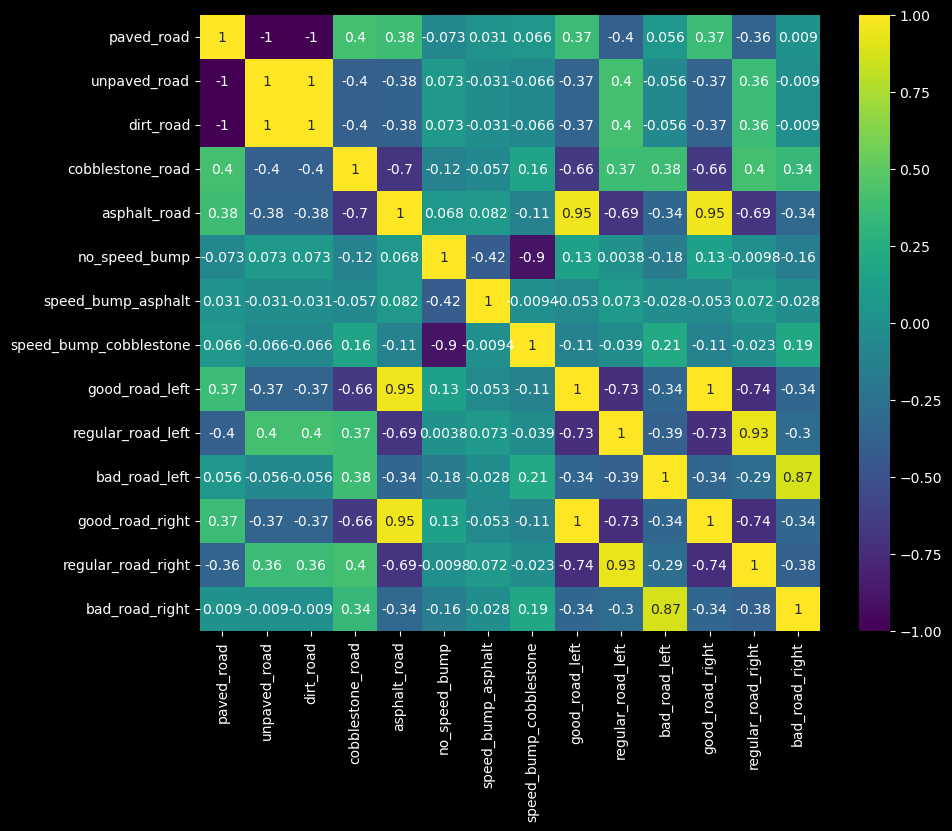

In [4]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=df1.corr(), annot=True, cmap='viridis')
plt.show()

# - Unpaved road and dirt road have 100% positive correlation, so one of these features can be dropped
# - Good road left and right have 100% positive correlation, but regular and bad road left and right are < 1 indicating labeling inconsistencies

In [5]:
# Load all datasets
datasets = getDatasets()

### Road Surface Type

There are three road surface types in datasets: asphalt, cobblestone, and dirt road. All types are present in all PVS datasets.

In [6]:
showMapDataClass([1,2,3], ["dirt_road", "cobblestone_road", "asphalt_road"], ["Dirt Road", "Cobblestone Road", "Asphalt Road"], ["red", "green", "blue"], datasets)

In [7]:
# Show class distribution metrics, which are the same for left and right hand side

metricsDataClass(["dirt_road", "cobblestone_road", "asphalt_road"], datasets)

dirt_road  cobblestone_road  asphalt_road   Total  \
PVS                                                      
1        25868             61659         56509  144036   
2        44618             20737         59330  124685   
3        28659             26143         51014  105816   
4        23903             57670         50919  132492   
5        60539             18143         55195  133877   
6        23888             31641         40750   96279   
7        23778             54224         50546  128548   
8        44939             18825         59854  123618   
9        23153             25182         43220   91555   

     dirt_road_distribuition_%  cobblestone_road_distribuition_%  \
PVS                                                                
1                        17.96                             42.81   
2                        35.78                             16.63   
3                        27.08                             24.71   
4                        18.04                             43.53   
5                        45.22                             13.55   
6                        24.81                             32.86   
7                        18.50                             42.18   
8                        36.35                             15.23   
9                        25.29                             27.50   

     asphalt_road_distribuition_%  
PVS                                
1                           39.23  
2                           47.58  
3                           48.21  
4                           38.43  
5                           41.23  
6                           42.32  
7                           39.32  
8                           48.42  
9                           47.21

### Road Surface Condition

There are two road surface conditions in datasets: paved and unpaved road. All types are present in all PVS datasets.

In [8]:
showMapDataClass([1,2,3], ["paved_road", "unpaved_road"], ["Paved Road", "Unpaved Road"], [ "blue", "red"], datasets)

In [9]:
# Show class distribution metrics, which are the same for left and right hand side

metricsDataClass(["paved_road", "unpaved_road"], datasets)

paved_road  unpaved_road   Total  paved_road_distribuition_%  \
PVS                                                                 
1        118168         25868  144036                       82.04   
2         80066         44618  124684                       64.22   
3         77157         28659  105816                       72.92   
4        108589         23903  132492                       81.96   
5         73338         60539  133877                       54.78   
6         72391         23888   96279                       75.19   
7        104770         23778  128548                       81.50   
8         78679         44939  123618                       63.65   
9         68402         23153   91555                       74.71   

     unpaved_road_distribuition_%  
PVS                                
1                           17.96  
2                           35.78  
3                           27.08  
4                           18.04  
5                           45.22  
6                           24.81  
7                           18.50  
8                           36.35  
9                           25.29

### Road Roughness Condition

There are three road roughness condition in datasets: good, regular, and bad road. All types are present in all PVS datasets.

In [10]:
showMapDataClass([1,2,3], ["good_road_left", "regular_road_left", "bad_road_left"], ["Good Road", "Regular Road", "Bad Road"], ["green", "yellow", "red"], datasets)

In [11]:
# Show class distribution metrics, which are the same for left and right hand side

metricsDataClass(["good_road_left", "regular_road_left", "bad_road_left"], datasets)

good_road_left  regular_road_left  bad_road_left   Total  \
PVS                                                             
1             56577              65304          22155  144036   
2             56086              37921          30677  124684   
3             50923              46638           8255  105816   
4             50744              62838          18910  132492   
5             53715              32999          47163  133877   
6             40446              51051           4782   96279   
7             49855              64743          13950  128548   
8             56466              29949          37203  123618   
9             42557              38919          10079   91555   

     good_road_left_distribuition_%  regular_road_left_distribuition_%  \
PVS                                                                      
1                             39.28                              45.34   
2                             44.98                              30.41   
3                             48.12                              44.07   
4                             38.30                              47.43   
5                             40.12                              24.65   
6                             42.01                              53.02   
7                             38.78                              50.36   
8                             45.68                              24.23   
9                             46.48                              42.51   

     bad_road_left_distribuition_%  
PVS                                 
1                            15.38  
2                            24.60  
3                             7.80  
4                            14.27  
5                            35.23  
6                             4.97  
7                            10.85  
8                            30.10  
9                            11.01

### Speed Bump Condition

There are three speed bump conditions in datasets: speed bump in asphalt, speed bump in cobblestone, and no speed bump.

In [12]:
showMapDataClass([1,2,3], ["speed_bump_asphalt", "speed_bump_cobblestone"], ["Speed Bump Asphalt", "Speed Bump Cobblestone"], [ "blue", "red"], datasets)

In [13]:
# Show class distribution metrics, which are the same for left and right hand side

metricsDataClass(["speed_bump_asphalt", "speed_bump_cobblestone", "no_speed_bump"], datasets)

speed_bump_asphalt  speed_bump_cobblestone  no_speed_bump   Total  \
PVS                                                                      
1                   626                    2829         140581  144036   
2                  2006                       0         122679  124685   
3                   299                     310         105207  105816   
4                   530                    2604         129358  132492   
5                  1943                       0         131934  133877   
6                   281                     325          95673   96279   
7                   568                    2308         125672  128548   
8                  1837                       0         121781  123618   
9                   308                     335          90914   91557   

     speed_bump_asphalt_distribuition_%  \
PVS                                       
1                                  0.43   
2                                  1.61   
3                                  0.28   
4                                  0.40   
5                                  1.45   
6                                  0.29   
7                                  0.44   
8                                  1.49   
9                                  0.34   

     speed_bump_cobblestone_distribuition_%  no_speed_bump_distribuition_%  
PVS                                                                         
1                                      1.96                          97.60  
2                                      0.00                          98.39  
3                                      0.29                          99.42  
4                                      1.97                          97.63  
5                                      0.00                          98.55  
6                                      0.34                          99.37  
7                                      1.80                          97.76  
8                                      0.00                          98.51  
9                                      0.37                          99.30